In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize # import figsize
#figsize(12.5, 4) # 设置 figsize
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import norm

# Linear Fit
![](b.png)

![](sse_0.png)

![](sst_0.png)

![](p.png)

![](h.png)

![](sst_1.png)

![](sse_1.png)

![](r_square.png)

![](s_square.png)

![](var_b_0.png)

![](var_b_1.png)
# Confidence Interval

![](b_confidence.png)

![](mu_Y.png)

![](mu_Y_confidence.png)

![](Y_confidence.png)
# Test for significance of regression
![](hypothesis_0_0.png)

![](hypothesis_0_1.png)

In [2]:
plt.rcParams['savefig.dpi'] = 150 #图片像素
plt.rcParams['figure.dpi'] = 150 #分辨率


# chi square distribution
#percents = [0.995, 0.990, 0.975, 0.950, 0.900, 0.100, 0.050, 0.025, 0.010, 0.005]
#print(np.array([chi2.isf(percents, df=i) for i in range(1, 47)]))
# t distribution
#percents = [0.100, 0.050, 0.025, 0.010, 0.005, 0.001, 0.0005]
#print(np.array([t.isf(percents, df=i) for i in range(1, 46)]))
# F distribution
#alpha = 0.2
#print(np.array([f.isf(alpha, df1, df2) for df1 in range(1, 11) for df2 in range(1, 16)]).reshape(10, -1).T)
# normal distribution
#print(norm.ppf(np.arange(0, 0.99, 0.001).reshape(-1, 10)))
def linearfit(x, y, x_given, alpha,order=None,plot=False):
    (m_x,n_x)=x.shape
    (m_y,n_y)=y.shape
    assert m_x>=n_x and m_y>=n_y and m_x==m_y
    assert x_given.shape == (1,n_x)
    
    if order == None:
        print('Multilinear Model\n')
        tmp = np.ones((m_x,1),dtype=np.float32)
        X = np.concatenate((tmp,x),axis=1)
        x_given = np.concatenate((np.array([[1.]]),x_given),axis=1)
        Y = y
    else:
        print(f'Polyinomial Model with order {len(order)-1}\n')
        assert n_x == 1
        
        tmp = np.array([[]])
        X = np.array([[]])
    
        for i in range(0,len(order)):
            if order[i] == 1:
                if X.size == 0:
                    X = x**i
                    tmp = x_given**i
                else:
                    X = np.concatenate((X,x**i),axis=1)
                    tmp = np.concatenate((tmp,x_given**i),axis=1)
            
        x_given = tmp
        Y = y
        n_x = X.shape[1]-1
    
    print(f'X with order {order}:\n {X}\n')
    print(f'x_given:\n {x_given}\n')
    tmp = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T)
    b = np.dot(tmp,Y)
    print(f'b with order {order}:\n {b}\n')
    H = np.dot(X,tmp)
    #print(f'H:\n {H}\n')
    assert np.sum(np.dot(H,X)-X) < 10**-5
    E = Y-np.dot(X,b)
    print(f'E:\n {E}\n')
    sse = np.sum(E**2)
    print(f'sse:\n {sse}\n')
    P=np.ones((m_x,m_x),dtype=np.float32)/m_x
    sst = np.sum((Y-np.dot(P,Y))**2)
    print(f'sst:\n {sst}\n')
    ssr=sst-sse
    print(f'ssr:\n {ssr}\n')
    r_square = ssr/sst
    print(f'r_square:\n {r_square}\n')
    s_square = sse/(m_x-n_x-1)
    print(f's_square:\n {s_square}\n')
    F = (m_x-n_x-1)/n_x*r_square/(1-r_square)
    print(f'F[{n_x},{m_x-n_x-1}]:\n{F}\n')
    print(f'F[{alpha}][{n_x},{m_x-n_x-1}]\n{f.isf(alpha, n_x, m_x-n_x-1)}\n')
    b_var_coeff = np.diagonal(np.linalg.inv(np.dot(X.T,X))).reshape(-1,1)
    print(f'Var[B]/sigma_square\n{b_var_coeff}\n')
    print(f'Var[B] Approximation:\n{b_var_coeff*s_square}\n')
    print(f'Standard Error[B]:\n{(b_var_coeff*s_square)**0.5}\n')
    delta = np.sqrt(s_square)*t.isf(alpha/2,m_x-n_x-1)*b_var_coeff**0.5
    b_lower= b - delta
    print(f'b {1-alpha} lower bound with order {order}:\n {b_lower}\n')
    print(f'b with order {order}:\n {b}\n')
    b_upper= b + delta
    print(f'b {1-alpha} upper bound with order {order}:\n {b_upper}\n')
    mu_Y = np.dot(x_given,b)
    tmp = np.dot(x_given,np.dot(np.linalg.inv(np.dot(X.T,X)),x_given.T))
    delta = np.sqrt(s_square)*t.isf(alpha/2,m_x-n_x-1)*tmp**0.5
    mu_Y_lower = mu_Y - delta
    mu_Y_upper = mu_Y + delta
    print(f'mu_Y|x_given {1-alpha} lower bound:\n {mu_Y_lower}\n')
    print(f'mu_Y|x_given :\n {mu_Y}\n')
    print(f'mu_Y|x_given {1-alpha} upper bound:\n {mu_Y_upper}\n')
        
    tmp = np.dot(x_given,np.dot(np.linalg.inv(np.dot(X.T,X)),x_given.T))+1
    delta = np.sqrt(s_square)*t.isf(alpha/2,m_x-n_x-1)*tmp**0.5
    Y = mu_Y
    Y_lower = Y - delta
    Y_upper = Y + delta
    print(f'Y|x_given {1-alpha} lower bound:\n {Y_lower}\n')
    print(f'Y|x_given :\n {Y}\n')
    print(f'Y|x_given {1-alpha} upper bound:\n {Y_upper}\n')
    
    if plot == True:
        if order!=None:
            x_min = min(x)
            x_max = max(x)
            x_interval  = np.arange(x_min,x_max,(x_max-x_min)/1000)
            y_interval  = np.zeros(x_interval.shape,dtype=np.float32)
            j=0
        
            for i in range(0,len(order)):
                if order[i] == 1:
                    y_interval += b[j][0]*x_interval**i
                    j += 1
            
            plt.plot(x_interval,y_interval,c='r')
            plt.scatter(x.T[0],y.T[0],c='b')
        else:
            print('Since the multilinear plot can hardly show anything clear, so no multilinear plot\n')
    
    #plt.scatter(x.T[0],E.T[0])
    #plt.scatter(x.T[0],y.T[0])
    #plt.show()
    


In [3]:
x = [ [1.35, 1.90, 1.70, 1.80, 1.30, 2.05, 1.60, 1.80, 1.85, 1.40]
    , [90, 30, 80, 40, 35, 45, 50, 60, 65, 30]
    ]


y = [ 
      [17.9, 16.5, 16.4, 16.8, 18.8, 15.5, 17.5, 16.4, 15.9, 18.3]
    ]

x_given = [ [1.5]
          , [70]
          ]


x = [[5, 7.5, 10, 12.5, 15, 17.5, 20]]
y = [[1, 2.2, 4.9, 5.3, 8.2, 10.7, 13.2]]
x_given = [[0]]

x = np.array(x).T
x_given = np.array(x_given).T
y = np.array(y).T
print(f'x:\n {x}\n')
print(f'y:\n {y}\n')
print(f'x_given:\n {x_given}\n')

x:
 [[ 5. ]
 [ 7.5]
 [10. ]
 [12.5]
 [15. ]
 [17.5]
 [20. ]]

y:
 [[ 1. ]
 [ 2.2]
 [ 4.9]
 [ 5.3]
 [ 8.2]
 [10.7]
 [13.2]]

x_given:
 [[0]]



Polyinomial Model with order 2

X with order [1, 1, 1]:
 [[  1.     5.    25.  ]
 [  1.     7.5   56.25]
 [  1.    10.   100.  ]
 [  1.    12.5  156.25]
 [  1.    15.   225.  ]
 [  1.    17.5  306.25]
 [  1.    20.   400.  ]]

x_given:
 [[1 0 0]]

b with order [1, 1, 1]:
 [[-1.03571429]
 [ 0.31285714]
 [ 0.02      ]]

E:
 [[-0.02857143]
 [-0.23571429]
 [ 0.80714286]
 [-0.7       ]
 [ 0.04285714]
 [ 0.13571429]
 [-0.02142857]]

sse:
 1.2185714285714286

sst:
 118.16000000000057

ssr:
 116.94142857142914

r_square:
 0.9896871070703164

s_square:
 0.30464285714285716

F[2,4]:
191.93200468933358

F[0.05][2,4]
6.944271909999155

Var[B]/sigma_square
[[6.28571429e+00]
 [1.96190476e-01]
 [3.04761905e-04]]

Var[B] Approximation:
[[1.91489796e+00]
 [5.97680272e-02]
 [9.28435374e-05]]

Standard Error[B]:
[[1.38379838]
 [0.244475  ]
 [0.00963554]]

b 0.95 lower bound with order [1, 1, 1]:
 [[-4.87775453]
 [-0.36591428]
 [-0.00675253]]

b with order [1, 1, 1]:
 [[-1.03571429]
 [ 0.31285714]
 [ 0.02

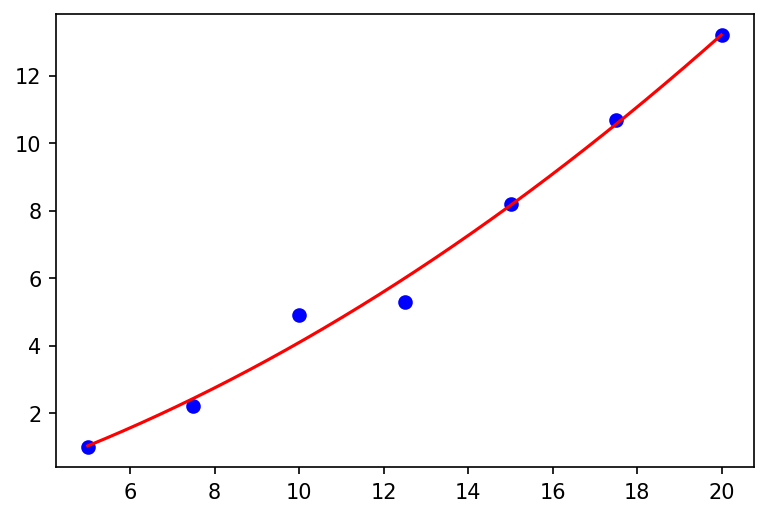

In [4]:
linearfit(x=x, y=y, x_given=x_given, alpha=0.05,order=[1,1,1],plot=True)

# Model Comparison
![](model_comparison.png)

In [5]:
#figsize(12.5, 4) # 设置 figsize
plt.rcParams['savefig.dpi'] = 150 #图片像素
plt.rcParams['figure.dpi'] = 150 #分辨率

def modelcomparison(x,y,order1,order2,alpha):
    (m_x,n_x)=x.shape
    (m_y,n_y)=y.shape
    assert m_x>=n_x and m_y>=n_y and m_x==m_y and n_x==1
    assert len(order1)==len(order2)  
    print(f'Polyinomial Models\n')
    
    X1 = np.array([[]])
    X2 = np.array([[]])
    
    for i in range(0,len(order1)):
        if order1[i] == 1:
            if X1.size == 0:
                X1 = x**i
            else:
                X1 = np.concatenate((X1,x**i),axis=1)
        if order2[i] == 1:
            if X2.size == 0:
                X2 = x**i
            else:
                X2 = np.concatenate((X2,x**i),axis=1)
        
        
    Y = y
    
    print(f'X1:\n {X1}\n')
    print(f'X2:\n {X2}\n')
    tmp = np.dot(np.linalg.inv(np.dot(X1.T,X1)),X1.T)
    b1 = np.dot(tmp,Y)
    print(f'b1 with order {order1}:\n {b1}\n')
    H1 = np.dot(X1,tmp)
    tmp = np.dot(np.linalg.inv(np.dot(X2.T,X2)),X2.T)
    b2 = np.dot(tmp,Y)
    print(f'b2 with order {order2}:\n {b2}\n')
    H2 = np.dot(X2,tmp)
    assert np.sum(np.dot(H1,X1)-X1) < 10**-5
    assert np.sum(np.dot(H2,X2)-X2) < 10**-5
    E1 = Y-np.dot(X1,b1)
    E2 = Y-np.dot(X2,b2)
    #print(f'E:\n {E1}\n')
    sse1 = np.sum(E1**2)
    sse2 = np.sum(E2**2)
    print(f'sse1:\n {sse1}\n')
    print(f'sse2:\n {sse2}\n')
    m = sum(order1)-1
    p = sum(order2)-1
    F = (m_x-p-1)/(p-m)*(sse1-sse2)/sse2
    print(f'F[{p-m},{m_x-p-1}]:\n{F}\n')
    print(f'F[{alpha}][{p-m},{m_x-p-1}]\n{f.isf(alpha, p-m, m_x-p-1)}\n')
    
    
    x_min = min(x)
    x_max = max(x)
    y_min = min(y)
    y_max = max(y)
    x_interval  = np.arange(x_min,x_max,(x_max-x_min)/1000)
    y1_interval  = np.zeros(x_interval.shape,dtype=np.float32)
    y2_interval  = np.zeros(x_interval.shape,dtype=np.float32)
    
    j1=0
    j2=0
    for i in range(0,len(order1)):
        if order1[i] == 1:
            y1_interval += b1[j1][0]*x_interval**i
            j1 += 1
        if order2[i] == 1:
            y2_interval += b2[j2][0]*x_interval**i
            j2 += 1
    plt.plot(x_interval,y1_interval,c='r')
    plt.plot(x_interval,y2_interval,c='g')
    plt.scatter(x.T[0],y.T[0],c='b')
    
    

In [6]:
x = [[5, 7.5, 10, 12.5, 15, 17.5, 20]]
y = [[1, 2.2, 4.9, 5.3, 8.2, 10.7, 13.2]]
x_given = [[0]]
#x = [[5, 5, 10, 10, 15, 15, 20, 20, 25, 25]]
#y = [[14.0, 12.5, 7.0 ,5.0, 2.1, 1.8, 6.2, 4.9, 13.2, 14.6]]
#x_given = [[0]]

x = np.array(x).T
y = np.array(y).T
print(f'x:\n {x}\n')
print(f'y:\n {y}\n')

x:
 [[ 5. ]
 [ 7.5]
 [10. ]
 [12.5]
 [15. ]
 [17.5]
 [20. ]]

y:
 [[ 1. ]
 [ 2.2]
 [ 4.9]
 [ 5.3]
 [ 8.2]
 [10.7]
 [13.2]]



Polyinomial Models

X1:
 [[ 1.   5. ]
 [ 1.   7.5]
 [ 1.  10. ]
 [ 1.  12.5]
 [ 1.  15. ]
 [ 1.  17.5]
 [ 1.  20. ]]

X2:
 [[  1.     5.    25.  ]
 [  1.     7.5   56.25]
 [  1.    10.   100.  ]
 [  1.    12.5  156.25]
 [  1.    15.   225.  ]
 [  1.    17.5  306.25]
 [  1.    20.   400.  ]]

b1 with order [1, 1, 0]:
 [[-3.66071429]
 [ 0.81285714]]

b2 with order [1, 1, 1]:
 [[-1.03571429]
 [ 0.31285714]
 [ 0.02      ]]

sse1:
 2.531071428571428

sse2:
 1.2185714285714286

F[1,4]:
4.308323563892143

F[0.05][1,4]
7.708647422176786



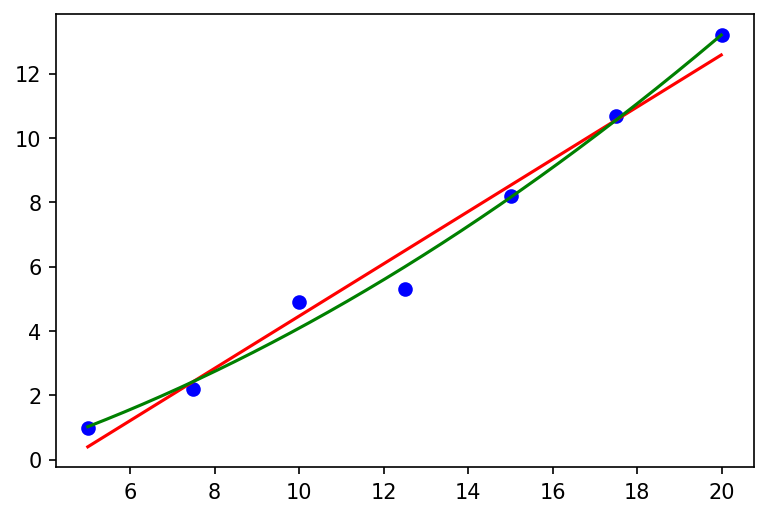

In [7]:
modelcomparison(x=x,y=y,order1=[1,1,0],order2=[1,1,1],alpha=0.05)

# Evidence of lack of fit

![](sse.png)

![](sse_pe.png)

![](sse_if.png)

## Number 2 used in the following context is due to the fact that the linear model only use two estimators. Howeve, there can also be more
![](lack_of_fit.png)

In [8]:
plt.rcParams['savefig.dpi'] = 200 #图片像素
plt.rcParams['figure.dpi'] = 200 #分辨率

def lackoffit(x, y, alpha,order=None,plot=False):
    (m_x,n_x)=x.shape
    (m_y,n_y)=y.shape
    assert m_x>=n_x and m_y>=n_y and m_x==m_y
    
    if order == None:
        print('No data for order, error\n')
        quit()
        
    else:
        print(f'Polyinomial Model with order {len(order)-1}\n')
        assert n_x == 1
        
        X = np.array([[]])
    
        for i in range(0,len(order)):
            if order[i] == 1:
                if X.size == 0:
                    X = x**i
                else:
                    X = np.concatenate((X,x**i),axis=1)
            
        Y = y
        n_x = X.shape[1]-1

    data = {}
    keys = list(x.T[0])
    values = list(y.T[0])
    for i in range(0,len(x)):
        if keys[i] not in data:
           data[keys[i]]=[values[i]]
        else:
           data[keys[i]].append(values[i])
    
    sse_pe = 0
    for key in data:
        value = np.array(data[key]).reshape(-1,1)
        sse_pe += np.sum((value-value.mean())**2)

    k = len(data)
    p = sum(order)

    
    print(f'X with order {order}:\n {X}\n')
    tmp = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T)
    b = np.dot(tmp,Y)
    print(f'b with order {order}:\n {b}\n')
    H = np.dot(X,tmp)
    #print(f'H:\n {H}\n')
    assert np.sum(np.dot(H,X)-X) < 10**-5
    E = Y-np.dot(X,b)
    #print(f'E:\n {E}\n')
    sse = np.sum(E**2)
    print(f'sse:\n {sse}\n')
    print(f'sse_pe:\n {sse_pe}\n')
    sse_if = sse - sse_pe
    print(f'sse_if:\n {sse_if}\n')
    F = (sse_if/(k-p))/(sse_pe/(m_x-k))
    print(f'F[{k-p},{m_x-k}]:\n{F}\n')
    print(f'F[{alpha}][{k-p},{m_x-k}]\n{f.isf(alpha, k-p,m_x-k)}\n')

    
    if plot == True:
        if order!=None:
            x_min = min(x)
            x_max = max(x)
            x_interval  = np.arange(x_min,x_max,(x_max-x_min)/1000)
            y_interval  = np.zeros(x_interval.shape,dtype=np.float32)
            j=0
        
            for i in range(0,len(order)):
                if order[i] == 1:
                    y_interval += b[j][0]*x_interval**i
                    j += 1
            
            plt.plot(x_interval,y_interval,c='r')
            plt.scatter(x.T[0],y.T[0],c='b')
        else:
            print('Since the multilinear plot can hardly show anything clear, so no multilinear plot\n')
    
    #plt.scatter(x.T[0],E.T[0])
    #plt.scatter(x.T[0],y.T[0])
    #plt.show()

In [9]:
x = [ 
      [1.0, 1.0, 3.3, 3.3, 4.0, 4.0, 4.0, 5.6, 5.6, 5.6, 6.0, 6.0, 6.5, 6.5]
    ]


y = [ 
      [1.6, 1.8, 1.8, 2.7, 2.6, 2.6, 2.2, 3.5, 2.8, 2.1, 3.4, 3.2, 3.4, 3.9]
    ]

x = np.array(x).T
y = np.array(y).T
print(f'x:\n {x}\n')
print(f'y:\n {y}\n')

x:
 [[1. ]
 [1. ]
 [3.3]
 [3.3]
 [4. ]
 [4. ]
 [4. ]
 [5.6]
 [5.6]
 [5.6]
 [6. ]
 [6. ]
 [6.5]
 [6.5]]

y:
 [[1.6]
 [1.8]
 [1.8]
 [2.7]
 [2.6]
 [2.6]
 [2.2]
 [3.5]
 [2.8]
 [2.1]
 [3.4]
 [3.2]
 [3.4]
 [3.9]]



Polyinomial Model with order 1

X with order [1, 1]:
 [[1.  1. ]
 [1.  1. ]
 [1.  3.3]
 [1.  3.3]
 [1.  4. ]
 [1.  4. ]
 [1.  4. ]
 [1.  5.6]
 [1.  5.6]
 [1.  5.6]
 [1.  6. ]
 [1.  6. ]
 [1.  6.5]
 [1.  6.5]]

b with order [1, 1]:
 [[1.23963312]
 [0.32444129]]

sse:
 2.120946906084485

sse_pe:
 1.6566666666666667

sse_if:
 0.4642802394178185

F[4,8]:
0.5604992829993785

F[0.05][4,8]
3.837853354555897



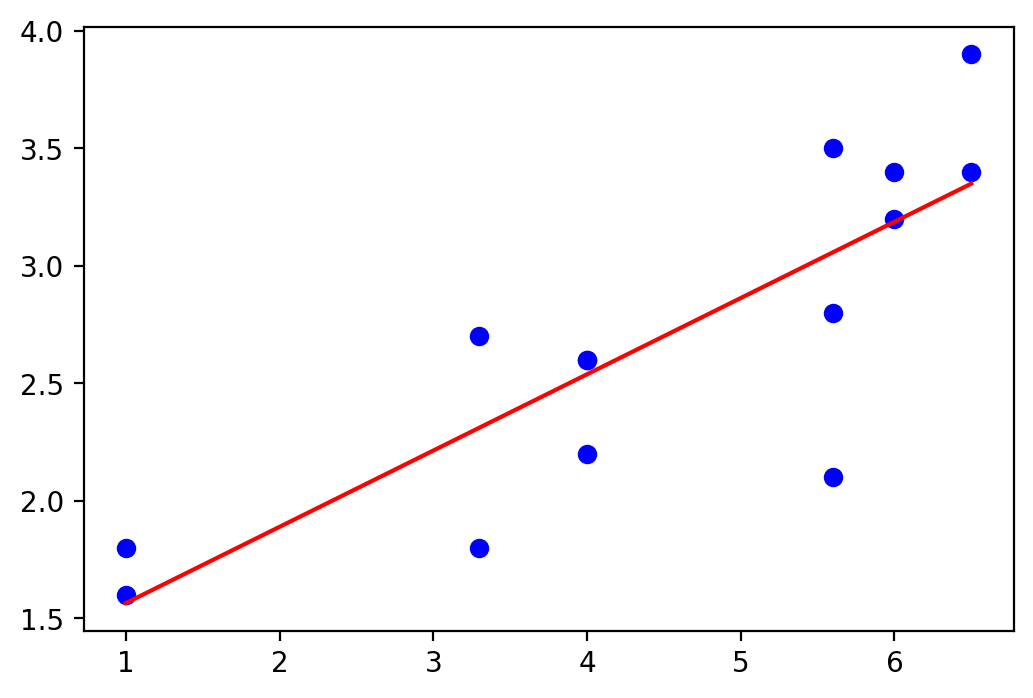

In [10]:
lackoffit(x=x, y=y, alpha=0.05,order=[1,1],plot=True)

# Multilinear plot 3D

In [3]:
#figsize(12.5, 4) # 设置 figsize
plt.rcParams['savefig.dpi'] = 150 #图片像素
plt.rcParams['figure.dpi'] = 150 #分辨率

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np


delta =0.1 
def plot3D(delta=0.01,n1=20000,n2=20000,X=np.arange(1,2.1, 0.01),Y=np.arange(30,90, 0.1)):
    
    X, Y = np.meshgrid(X, Y, sparse=False)
    fig=plt.figure(num=0,figsize=(10, 10))
    ax = plt.axes(projection='3d')
    #ax=fig.gca(projection="3d")
    #ax.view_init(elev=elev, azim=azim)
    [b0,b1,b2]= [24.7489, -4.1593, -0.014895]
    
    Z = b0 + b1*X + b2*Y
    #ax.scatter(x.T[0],x.T[1],y.T[0], c='r', marker='o')
    #ax.plot_surface(X, Y, Z, cmap='Greys')
    ax.plot_wireframe(X, Y, Z, rstride=100, cstride=10)
    X = x.T[0]
    Y = x.T[1]
    Z = y.T[0]
    index = (b0 + b1*X + b2*Y<=Z)
    
    ax.scatter(X[index],Y[index],Z[index], c='r', marker='o')
    ax.scatter(X[index!=1],Y[index!=1],Z[index!=1], c='g', marker='o')


In [4]:
x = [ [1.35, 1.90, 1.70, 1.80, 1.30, 2.05, 1.60, 1.80, 1.85, 1.40]
    , [90, 30, 80, 40, 35, 45, 50, 60, 65, 30]
    ]


y = [ 
      [17.9, 16.5, 16.4, 16.8, 18.8, 15.5, 17.5, 16.4, 15.9, 18.3]
    ]

x = np.array(x).T
y = np.array(y).T
print(f'x:\n {x}\n')
print(f'y:\n {y}\n')

x:
 [[ 1.35 90.  ]
 [ 1.9  30.  ]
 [ 1.7  80.  ]
 [ 1.8  40.  ]
 [ 1.3  35.  ]
 [ 2.05 45.  ]
 [ 1.6  50.  ]
 [ 1.8  60.  ]
 [ 1.85 65.  ]
 [ 1.4  30.  ]]

y:
 [[17.9]
 [16.5]
 [16.4]
 [16.8]
 [18.8]
 [15.5]
 [17.5]
 [16.4]
 [15.9]
 [18.3]]



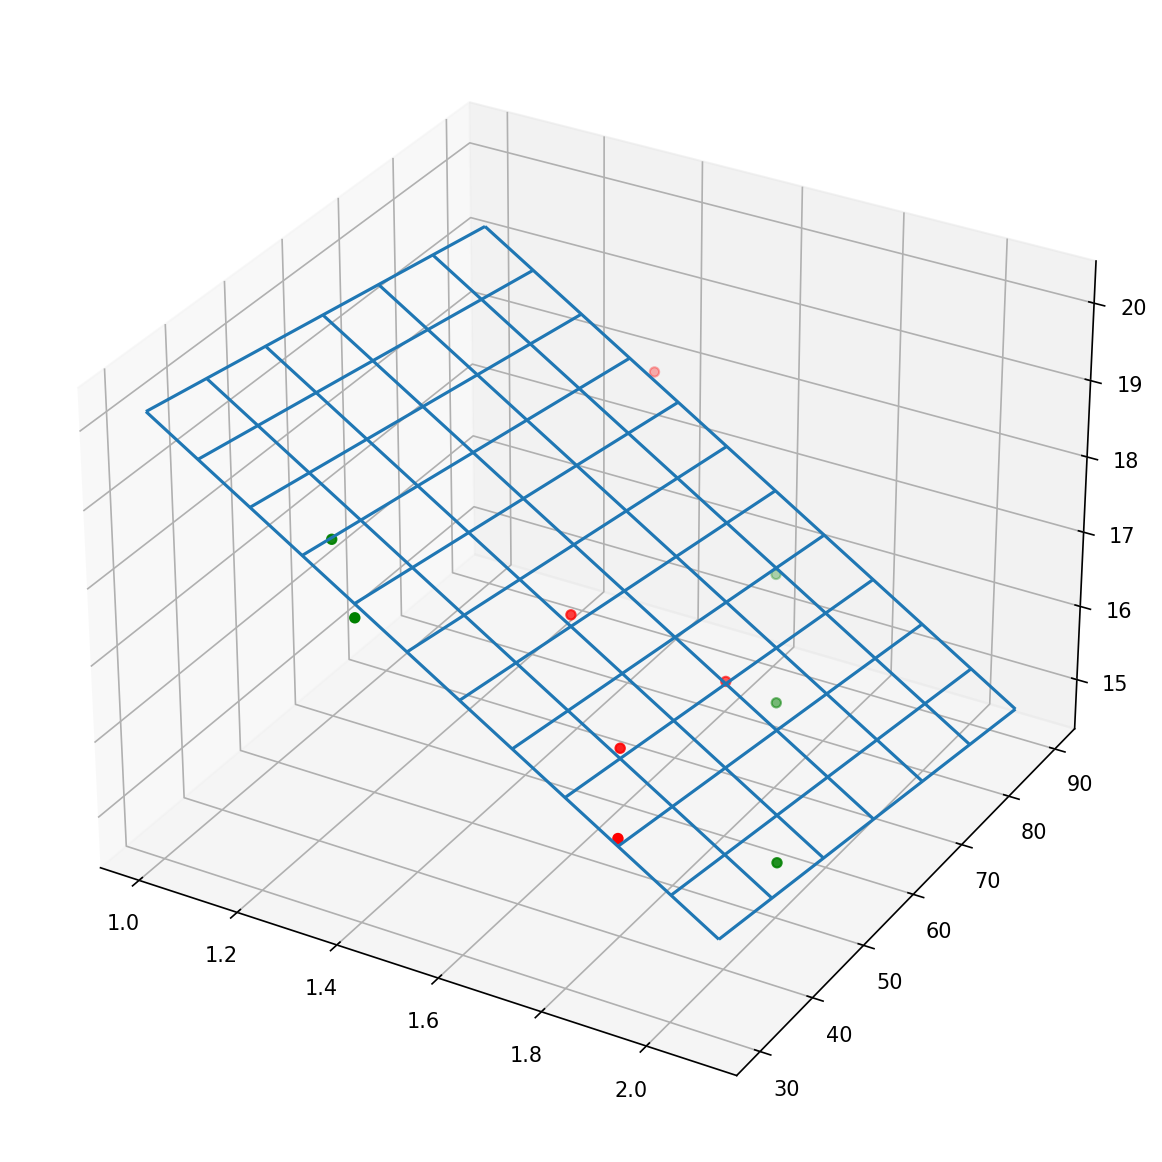

In [5]:
plot3D()